# Машинная арифметика

Вычислительная техника оперирует числами с конечным числом (двоичных) цифр
$$
x = \pm\overline{1.b_1 b_2 \dots b_K} \cdot 2^e
$$

Числа в машинном представлении имеют _фиксированное число значащих цифр_, равное $K+1$.

# Погрешность машинного представления
Действительные числа в машинном представлении приходится округлять до $K$ цифр после запятой. При этом число $x$, имеющее машинное представление $X$, находится где-то в диапазоне
$$
x \in \left[X - \Delta X, X + \Delta X\right], \qquad X = \pm\overline{1.b_1 b_2 \dots b_K} \cdot 2^e\\
\Delta X \leqslant  \frac{1}{2} 2^{-K} \cdot 2^e \leqslant |X| \cdot 2^{-K-1}
$$

Величина $\Delta X$ назвается **абсолютной погрешностью** представления $x$.

**Относительная погрешность** представления чисел в арифметике с плавающей точкой зависит от количества используемых цифр $K$, но не от самого числа $x$:
$$
\frac{\Delta X}{|X|} \leqslant \delta = 2^{-K-1}
$$

# Одинарная и двойная точность
Стандартом IEEE 754 определяются несколько форматов представления чисел в компьютере. Самыми распространенными являются
 * одинарная точность, single precision (`float` в C). Имеет $K = 23$ и обеспечивает относительную точность $\delta = 2^{-24} \approx 5.96 \cdot 10^{-8}$
 * двойная точность, double precision (`double` в C). Имеет $K = 52$ и обеспечивает относительную точность $\delta = 2^{-53} \approx 1.11 \cdot 10^{-16}$

# Источники ошибок

### Неопределенность входных данных.

Пусть $ x - \varepsilon < x^* < x + \varepsilon $. По $ x^* $ вычисляем $ y^* = f( x^* ) $, при этом $ f( x^* ) - \delta \leq y^* \leq f( x^* ) + \delta $.

Пусть $ a \leq y^* \leq b $, тогда:

$$ | y - y^* | \leq | b - a | $$

$$ y^*_{опт} \leq ( b - a ) / 2 $$

$$ | y - y^* | \leq | b - a | / 2 $$

### Погрешность метода

Многие методы вычислительной математики являются приближенными, то есть позволяют получить ответ с заданной точностью. Крайне важно уметь определять погрешность, обусловленную использованием приближенного метода. Такая погрешность называется **ошибкой метода**.

Например, рассмотрим метод вычисления функции $e^x$, основанный на формуле Тейлора в окрестности $x = 0$.
$$
e^x \approx 1 + x + \frac{x^2}{2} + \dots = \sum_{k = 0}^{n-1} \frac{x^k}{k!}.
$$
Отметим, что число $n$ является параметром метода.

С помощью формулы Тейлора с остаточным членов в форме Лагранжа удается оценить ошибку такого метода:
$$
S_n = \sum_{k=0}^{n-1} \frac{x^k}{k!}\\
e^x = 1 + x + \dots + \frac{x^{n-1}}{(n-1)!} + e^{\xi}\frac{x^n}{n!}, \quad \xi \in [0, x]\\
|e^x - S_n| \leqslant \max(1, e^x) \frac{|x|^n}{n!} \equiv \varepsilon_\text{method}
$$
Несложно видеть, что при $n \to \infty$ ошибка метода стремится к нулю.

### Погрешность округления

Погрешность округления непосредственно связана с **погрешностью машинного представления**. 

__Определение.__ $ \varepsilon_{mash} $ - наибольшая величина, для которой справедливо тождество $ 1 + \varepsilon_{mash} = 1 $

* для одинарная точность $\varepsilon_{mash} \approx 10^{-8}$
* для двойная точность $\varepsilon_{mash} \approx 10^{-16}$

In [3]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

In [4]:
def MyExp( x, n ):
    
    S = 0.0
    
    a = 1.0
    
    for j in np.arange( 0, n, 1 ):
        
        S += a
        
        a = a * x / ( j + 1 )
        
    return S

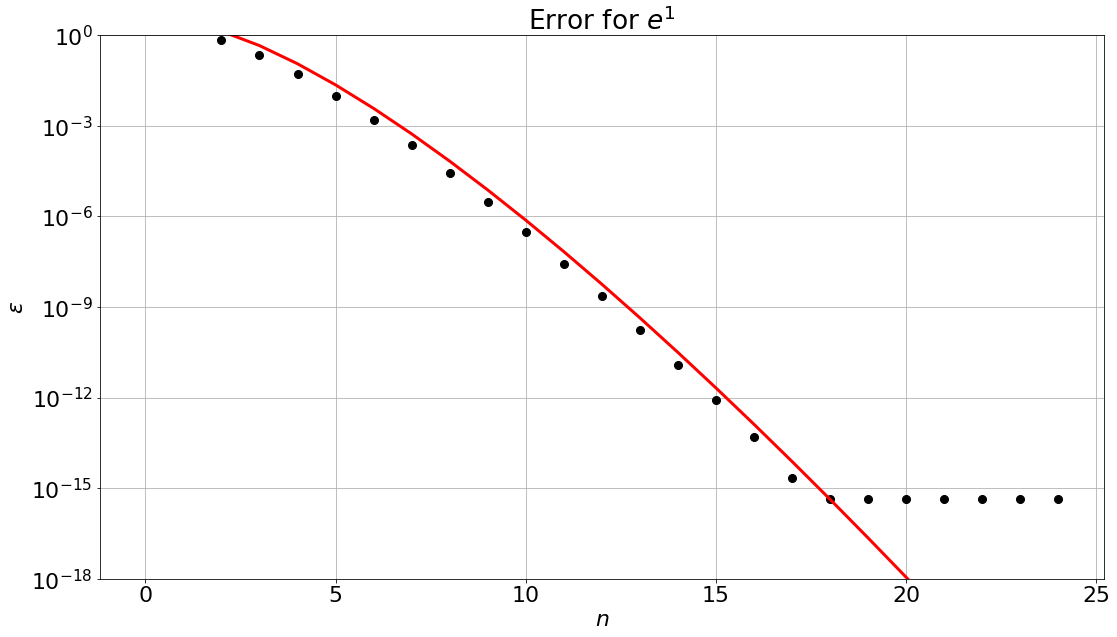

In [22]:
N = 25

x = 1.0

ns = np.zeros( N )

Error = np.zeros( N )

for i in np.arange( 0, N, 1 ):
    
    ns[ i ] = i
    
    Error[ i ] = np.fabs( np.exp( x ) - MyExp( x, i ) )
    
plt.figure( figsize = ( 18, 10 ) )
plt.semilogy( ns, Error, 'k.', ms = 16 )
plt.semilogy( ns, max( 1, np.exp( x ) ) * x**ns / gamma( ns + 1 ), 'r', lw = 3 )
plt.rc('font', **{'size' : 22})
plt.ylim( [ 1e-18, 1 ] )
plt.xlabel( '$n$' )
plt.ylabel( '$\\varepsilon$' )
plt.title( 'Error for $e^{%g}$' % x )
plt.grid()
plt.show()

## Численное дифференцирование
Дана функция $f(x)$ в виде черного ящика: ее можно вычислять в различных точках $x$ и получать резлультат с погрешностью $\Delta f$. Известно, что функция достаточно гладкая, но конкретный вид функции не задан. Необходимо получить значение ее производной $f'(x)$ в точке $x_0$.

Вспомним определение производной
$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}. $$

### Конечные разности

* **Производная вперед** $$ f'(x_0) \approx \frac{ f( x_0 + h ) - f( x_0 ) }{ h } $$

* **Производная назад** $$ f'(x_0) \approx \frac{ f( x_0 ) - f( x_0 - h ) }{ h } $$

* **Центральная разность** $$ f'(x_0) \approx \frac{ f( x_0 + h ) - f( x_0 - h ) }{ 2 h } $$

Рассмотрим подробнее производную вперед при некотором значении $h > 0$. Интуитивно понятно, что чем меньше $ h $, тем точнее метод. Покажем это, найдя ошибку метода. Для этого нужно оценить величину

$$ \left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| $$

### Оценка ошибки метода для конечных разностей

Воспользуемся формулой Тейлора с остаточным членом в форме Лагранжа:

$$
f(x_0 + h) = f(x_0) + f'(x_0) h + \frac{f''(\xi)}{2} h^2, \;\; \xi \in [x_0, x_0 + h].\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| = \frac{|f''(\xi)|h}{2}.
$$

Пусть известно, что $ | f''(\xi) | \leq M_2 $. Тогда ошибку метода можно оценить как

$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant \varepsilon_\text{method} = \frac{M_2 h}{2}.
$$

Из оценки

$$ \left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant \varepsilon_\text{method} = \frac{M_2 h}{2}. $$

видно, что ошибка метода стремится к нулю при $ h \to 0 $, причем $ \varepsilon_\text{method} = O(h) $.

Говорят, что данный метод имеет **первый порядок**, так как его ошибка стремится к нулю как первая степень величины $ h $, которую называют **шагом дифференцирования**

### Оценка ошибки округления для конечных разностей

Пусть $ | f( \xi ) | \leq M_0 $. Тогда модуль $ \varepsilon_{round} $ можно оценить седующим выражением:

$$ | \varepsilon_{round} | \leq | \frac{ M_0 \varepsilon_{mash} + M_0 \varepsilon_{mash} }{ h } | = \frac{ 2 M_0 \varepsilon_{mash} }{ h }$$

### Оценка полной ошибки для конечных разностей

Полная ошибка ($ \varepsilon_f $) является суммой ошибок метода и окрегления и описывется выражением:

$$ \varepsilon_f = \varepsilon_{round} + \varepsilon_{method} = \frac{ M_2 h }{ 2 } + \frac{ 2 M_0 \varepsilon_{mash} }{ h } $$

#### Пример

Для примера снова рассмотрим $ f( x ) = e^x $ в точке $ x_0 = 1 $.

* Определим $M_0$. Так как $ e^{ x_0 } = e $, поэтому возьмем $ M_0 = 3 $

Расчитаем вторую производную: $ f''( x ) = x^2 e^x $. Так как $ f''( x_0 ) = e $, поэтому  возьмем $ M_2 = 3 $.

Тогда $ \varepsilon_{окр} = 1,5 h;\ \varepsilon_{method} = ( 6 \varepsilon_{mash} ) / h;\ \varepsilon_f = 1,5 h + ( 6 \varepsilon_{mash} ) / h $, при этом возьмем $ \varepsilon_{mash} = 10^{-8} $

In [8]:
def EpsRound( h ):
    
    return 1.5 * h

def EpsMethod( h, eps_mash ):
    
    return 6.0 * eps_mash / h

def EpsFun( h ):
    
    global EpsRound, EpsMethod
    
    global epsmash
    
    return EpsRound( h ) + EpsMethod( h, epsmash )

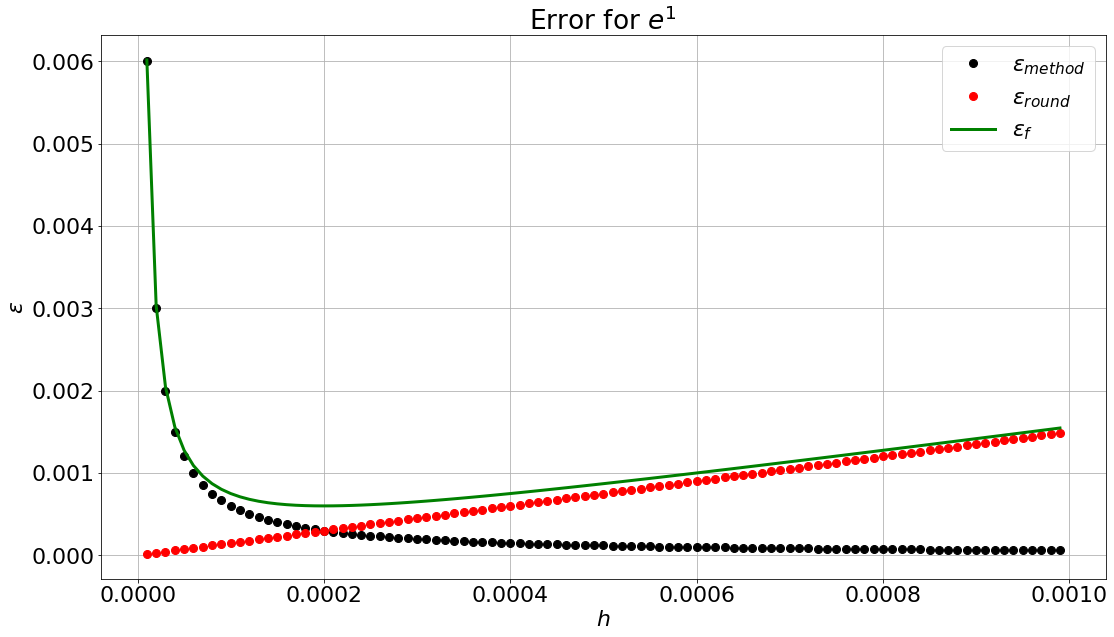

In [38]:
N = 100

step = 1.0e-5

epsmash = 1.0e-8

Ef = np.zeros( N - 1 )

Emethod = np.zeros( N - 1 )

Eround = np.zeros( N - 1 )

H = np.arange( 1, N, 1 ) * step

for i in np.arange( 0, N - 1, 1 ):
    
    Ef[ i ] = EpsFun( H[ i ] )
    
    Emethod[ i ] = EpsMethod( H[ i ], epsmash )
    
    Eround[ i ] = EpsRound( H[ i ] )

plt.figure( figsize = ( 18, 10 ) )
plt.plot( H, Emethod, 'k.', ms = 16 )
plt.plot( H, Eround, 'r.', ms = 16 )
plt.plot( H, Ef, 'g-', lw = 3 )
plt.rc('font', **{'size' : 22})
plt.xlabel( '$h$' )
plt.ylabel( '$\\varepsilon$' )
plt.legend( [ '$\\varepsilon_{method}$', '$\\varepsilon_{round}$', '$\\varepsilon_{f}$' ] )
plt.title( 'Error for $e^{1}$' )
plt.grid()
plt.show()
    

## Оптимальный шаг дифференцирования

Можно заметить, что $ \varepsilon_f $ имеет минимум. Определим какой шаг дифференцирования соответствует этому минимуму.

Произведем расчет первой производной полной ошибки по шагу дифференцирования

$$ \varepsilon_f' = \frac{ M_2 }{ 2 } - \frac{ 2 M_0 \varepsilon_{mash} }{ h^2 }$$

В минимуме первая производная равна 0, тогда оптимальное значение шага дифференцирования равно:

$$ h_{опт} = 2 \sqrt{ \frac{ M_0 \varepsilon_{mash} }{ M_2 } } $$

Отсюда $\varepsilon_{f,min} $:

$$ \varepsilon_{f,min} = 2 \sqrt{ \frac{ M_0 \varepsilon_{mash} }{ M_2 } } \frac{ M_2 }{ 2 } + \frac{ 2 M_0 \varepsilon_{mash} }{ 2 \sqrt{ \frac{ M_0 \varepsilon_{mash} }{ M_2 } } } = 2 \sqrt{ M_0 M_2 \varepsilon_{mash} } $$

In [39]:
def h_opt( M0, M2 ):
    
    global epsmash
    
    return 2 * np.sqrt( M0 * epsmash / M2 )

def EpsMin( M0, M2 ):
    
    global epsmash
    
    return 2.0 * np.sqrt( M0 * M2 * epsmash )

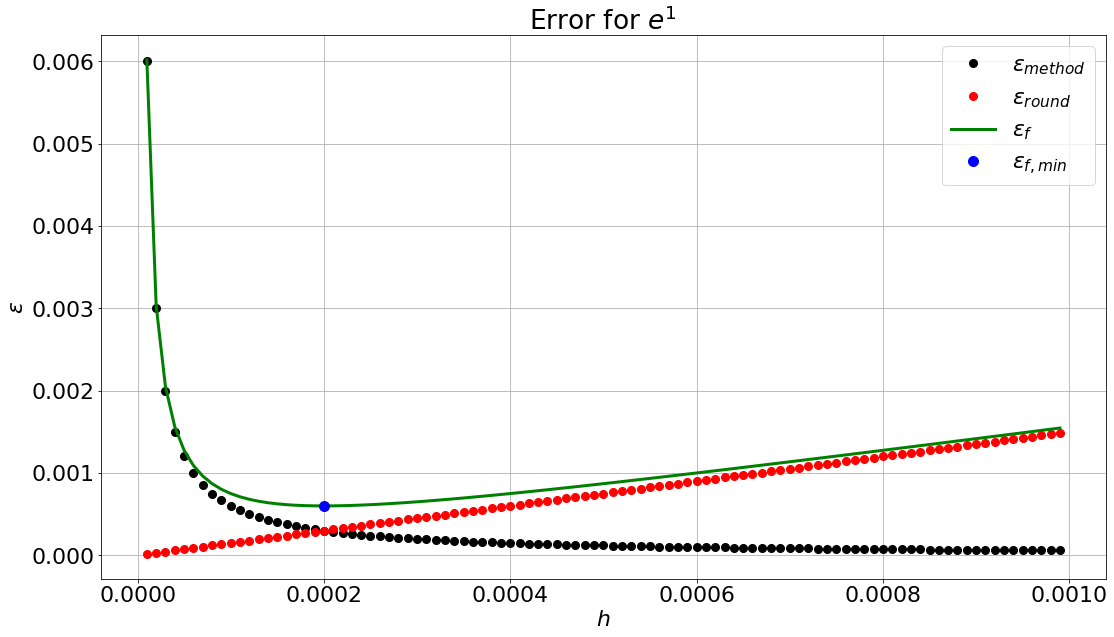

In [41]:
N = 100

step = 1.0e-5

epsmash = 1.0e-8

M0 = M2 = 3.0

Ef = np.zeros( N - 1 )

Emethod = np.zeros( N - 1 )

Eround = np.zeros( N - 1 )

H = np.arange( 1, N, 1 ) * step

for i in np.arange( 0, N - 1, 1 ):
    
    Ef[ i ] = EpsFun( H[ i ] )
    
    Emethod[ i ] = EpsMethod( H[ i ], epsmash )
    
    Eround[ i ] = EpsRound( H[ i ] )

plt.figure( figsize = ( 18, 10 ) )
plt.plot( H, Emethod, 'k.', ms = 16 )
plt.plot( H, Eround, 'r.', ms = 16 )
plt.plot( H, Ef, 'g-', lw = 3 )
plt.plot( [ h_opt( M0, M2 ), ], [ EpsMin( M0, M2 ), ], 'b.', ms = 20 )
plt.rc('font', **{'size' : 22})
plt.xlabel( '$h$' )
plt.ylabel( '$\\varepsilon$' )
plt.legend( [ '$\\varepsilon_{method}$', '$\\varepsilon_{round}$', '$\\varepsilon_{f}$', '$\\varepsilon_{f,min}$' ] )
plt.title( 'Error for $e^{1}$' )
plt.grid()
plt.show()